Phase 4 Project Notebook by Ryan S. Chung

# Introduction

In [1]:
import pandas as pd
import numpy as np
import os , shutil
import glob

In [2]:
import cv2
import matplotlib.image as mpimg

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.image as mpimg

In [5]:
import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initial MLP Creation

In [7]:
NORMAL = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
PNEUMONIA = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [8]:
data = []
labels = []

In [9]:
for i in NORMAL:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    
for i in PNEUMONIA:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [10]:
data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Label: 0


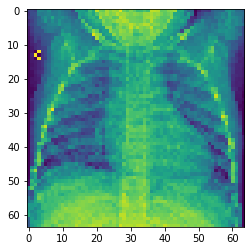

In [11]:
sample_image = X_train[0]
sample_label = y_train[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

In [12]:
sample_image

array([[ 47,  58,  53, ...,  93,  92,  84],
       [ 37,  60,  63, ..., 102,  99,  94],
       [ 43,  54,  63, ..., 119, 108,  86],
       ...,
       [ 90, 144, 124, ..., 154, 111,   0],
       [ 73, 147, 154, ..., 160, 107,   0],
       [ 72, 136, 152, ..., 175,  81,   0]], dtype=uint8)

In [13]:
print(X_train.shape)
X_test.shape

(4172, 64, 64)


(1044, 64, 64)

In [14]:
X_train = X_train.reshape(4172, 4096).astype('float')
X_test = X_test.reshape(1044, 4096).astype('float')

In [15]:
print(X_train.shape)
X_test.shape

(4172, 4096)


(1044, 4096)

In [16]:
X_train /= 255.
X_test /= 255.

In [17]:
y_train[:2]

array([0, 1])

In [18]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [19]:
y_train[0]

array([1., 0.], dtype=float32)

In [20]:
Model_1 = Sequential()
Model_1.add(Dense(64, activation = 'tanh', input_shape = (4096,)))
Model_1.add(Dense(2, activation = 'softmax'))

In [21]:
Model_1.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [22]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 262,338
Trainable params: 262,338
Non-trainable params: 0
_________________________________________________________________


In [23]:
results_1 = Model_1.fit(X_train, y_train, epochs = 12, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 4ms/step - loss: 0.5442 - acc: 0.7668 - val_loss: 0.4050 - val_acc: 0.7586
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3718 - acc: 0.8430 - val_loss: 1.0727 - val_acc: 0.3898
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3172 - acc: 0.8696 - val_loss: 0.3709 - val_acc: 0.8113
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2535 - acc: 0.8984 - val_loss: 0.5633 - val_acc: 0.7567
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2331 - acc: 0.9104 - val_loss: 0.1884 - val_acc: 0.9320
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2027 - acc: 0.9199 - val_loss: 0.7422 - val_acc: 0.7423
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1923 - acc: 0.9247 - val_loss: 0.2207 - val_acc: 0.9224
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1985 - acc: 0.92

In [24]:
def visualize_training_results(results):
    
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

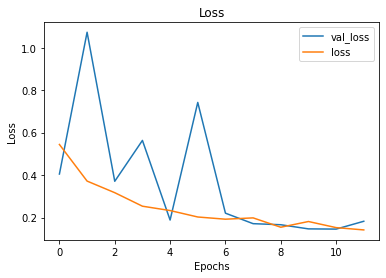

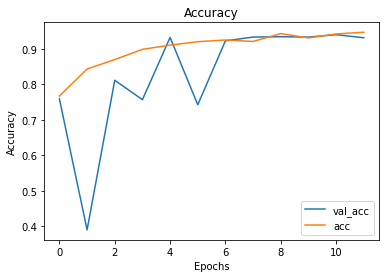

In [25]:
visualize_training_results(results_1)

In [26]:
Model_2 = Sequential()
Model_2.add(Dense(64, activation='tanh', input_shape=(4096,)))
Model_2.add(Dense(32, activation='tanh'))
Model_2.add(Dense(2, activation='softmax'))

In [27]:
Model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [28]:
Model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [29]:
results_2 = Model_2.fit(X_train, y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.4935 - acc: 0.7874 - val_loss: 1.1482 - val_acc: 0.2854
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3782 - acc: 0.8305 - val_loss: 0.3231 - val_acc: 0.8841
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3311 - acc: 0.8595 - val_loss: 0.4205 - val_acc: 0.7921
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2507 - acc: 0.8950 - val_loss: 0.3052 - val_acc: 0.8745
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2506 - acc: 0.9000 - val_loss: 0.4629 - val_acc: 0.7845
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2101 - acc: 0.9147 - val_loss: 0.1805 - val_acc: 0.9301
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2048 - acc: 0.9197 - val_loss: 0.2839 - val_acc: 0.8736
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1857 - acc: 0.92

In [30]:
def visualize_training_results(results):
    history = results.history
    
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

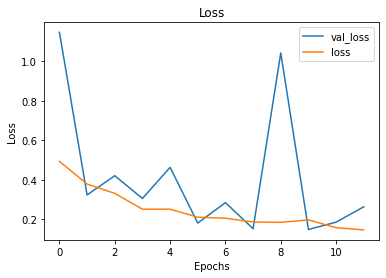

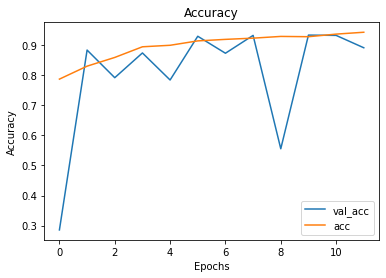

In [31]:
visualize_training_results(results_2)

In [32]:
Model_3 = Sequential()
Model_3.add(Dense(64, activation='relu', input_shape=(4096,)))
Model_3.add(Dense(32, activation='relu'))
Model_3.add(Dense(2, activation='softmax'))

In [33]:
Model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [34]:
Model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [35]:
results_3 = Model_3.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.4818 - acc: 0.7927 - val_loss: 0.3979 - val_acc: 0.8956
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3727 - acc: 0.8313 - val_loss: 0.2708 - val_acc: 0.9128
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3046 - acc: 0.8826 - val_loss: 0.2295 - val_acc: 0.9157
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2718 - acc: 0.8878 - val_loss: 0.2814 - val_acc: 0.8956
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2492 - acc: 0.9027 - val_loss: 0.3077 - val_acc: 0.8573
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2414 - acc: 0.8998 - val_loss: 0.2055 - val_acc: 0.9234
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1886 - acc: 0.9231 - val_loss: 0.2144 - val_acc: 0.9061
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1704 - acc: 0.93

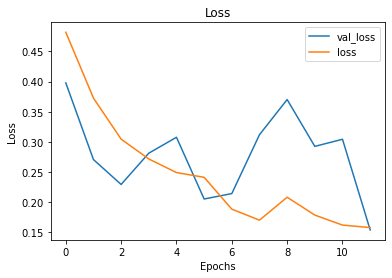

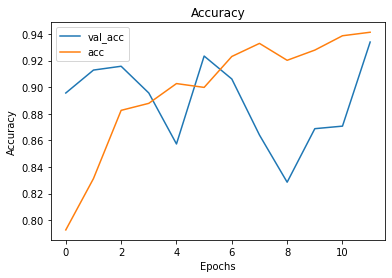

In [36]:
visualize_training_results(results_3)

In [37]:
results_train = Model_3.evaluate(X_train, y_train)

131/131 [==============================] - 0s 557us/step - loss: 0.1440 - acc: 0.9461


In [38]:
results_test = Model_3.evaluate(X_test, y_test)

33/33 [==============================] - 0s 621us/step - loss: 0.1542 - acc: 0.9339


In [39]:
results_train

[0.14396408200263977, 0.9460690021514893]

In [40]:
results_test

[0.15420790016651154, 0.9339080452919006]

# Creation of CNN

In [41]:
# Creating a CNN

In [42]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test",
    target_size=(64, 64), batch_size = 180)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val",
    target_size=(64, 64), batch_size = 200)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train",
    target_size=(64, 64), batch_size = 200)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [43]:
# Creating the data sets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [44]:
# Explore your dataset again

m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 200
Number of testing samples: 180
Number of validation samples: 16
train_images shape: (200, 64, 64, 3)
train_labels shape: (200, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [45]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(200, 12288)
(180, 12288)
(16, 12288)


In [46]:
train_y = np.reshape(train_labels[:,0], (200,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [47]:
# Sample Image Display from train

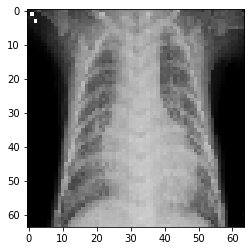

In [48]:
display(plt.imshow(train_images[0]))

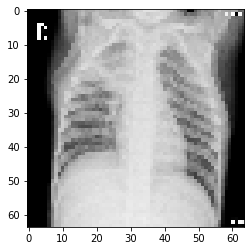

In [49]:
display(plt.imshow(train_images[1]))

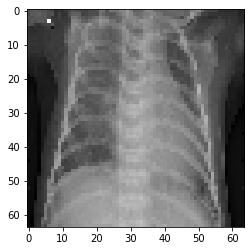

In [50]:
display(plt.imshow(train_images[2]))

In [51]:
from keras import models
from keras import layers
np.random.seed(123)

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
7/7 [==============================] - 0s 15ms/step - loss: 0.7130 - accuracy: 0.6050 - val_loss: 0.7101 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.7200 - val_loss: 0.7356 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.7200 - val_loss: 0.7606 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7200 - val_loss: 0.7946 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7200 - val_loss: 0.8161 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.7200 - val_loss: 0.7886 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7200 - val_loss: 0.8016 - val_accuracy: 0.5000
Epoch 8/50
7/7 [=================

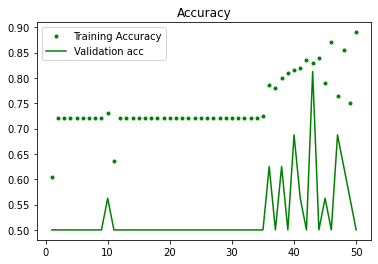

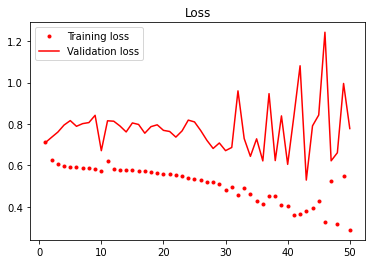

In [53]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [54]:
# visualize_training_results(history_A)

In [55]:
results_train = model.evaluate(train_img, train_y)

7/7 [==============================] - 0s 785us/step - loss: 0.8614 - accuracy: 0.4200


In [56]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 750us/step - loss: 0.7823 - accuracy: 0.5167


In [57]:
results_train

[0.8613598346710205, 0.41999998688697815]

In [58]:
results_test

[0.7822510600090027, 0.5166666507720947]

In [59]:
# Building a CNN

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6716 - acc: 0.7200 - val_loss: 0.6982 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6492 - acc: 0.7200 - val_loss: 0.7144 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6231 - acc: 0.7200 - val_loss: 0.7259 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6123 - acc: 0.7200 - val_loss: 0.7507 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6035 - acc: 0.7200 - val_loss: 0.7767 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5997 - acc: 0.7200 - val_loss: 0.7880 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5950 - acc: 0.7200 - val_loss: 0.7963 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5940 - acc: 0.7200 - val

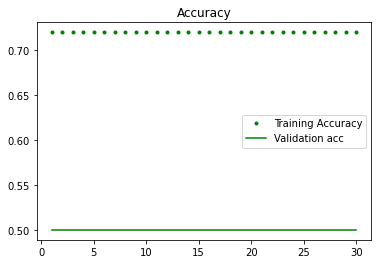

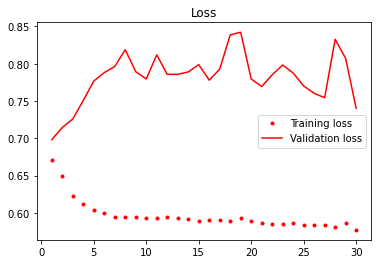

In [61]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [62]:
# visualize_training_results(history_B)

In [63]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.5833 - acc: 0.7200


In [64]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 6ms/step - loss: 0.6482 - acc: 0.6278


In [65]:
results_train

[0.5832634568214417, 0.7200000286102295]

In [66]:
results_test

[0.648226261138916, 0.6277777552604675]

# Grid Search Tuning

In [67]:
pip install talos

Note: you may need to restart the kernel to use updated packages.


In [68]:
import talos
import numpy

In [69]:
NORMAL_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
PNEUMONIA_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [70]:
data_2 = []
labels_2 = []

In [71]:
for i in NORMAL_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data_2.append(image)
    labels_2.append(0)
    
for i in PNEUMONIA_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data_2.append(image)
    labels_2.append(1)

In [72]:
data_2 = np.array(data_2)
labels_2 = np.array(labels_2)

X_train, X_test, y_train, y_test = train_test_split(data_2, labels_2, test_size=0.2, random_state=42)

In [73]:
def dense_network(x_train, y_train, x_test, y_test, params):
    
    model = models.Sequential()
    
    # hidden layers
    model.add(layers.Conv2D(32, (3, 3), activation=params['activation1'], input_shape=(64 ,64,  3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (4, 4), activation=params['activation2']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation=params['activation3']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation=params['activation4']))
    model.add(layers.Dropout(params['dropout']))
    
    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=params['optimizer'],
              metrics=['acc'])

    out = model.fit(train_images,
                        train_y,
                        epochs=30,
                        batch_size=32,
                        validation_data=(val_images, val_y))
    return out, model

In [74]:
params = {'dropout': [0.1, 0.3, 0.5],
         'optimizer': ['adam', 'sgd'],
         'activation1': ['relu', 'tanh'],
         'activation2': ['relu', 'tanh'],
         'activation3': ['relu', 'tanh'],
         'activation4': ['relu', 'tanh'],}

In [75]:
results = talos.Scan(X_train, y_train, params=params, model = dense_network, experiment_name='grid')

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6015 - acc: 0.7200 - val_loss: 0.8595 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6026 - acc: 0.7200 - val_loss: 0.7301 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5750 - acc: 0.7200 - val_loss: 0.8108 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5624 - acc: 0.7200 - val_loss: 0.6833 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5360 - acc: 0.7200 - val_loss: 0.7642 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4626 - acc: 0.7300 - val_loss: 0.7470 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3979 - acc: 0.8000 - val_loss: 0.5907 - val_acc: 0.8125
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4433 - acc: 0.7900 - val

  1%|          | 1/96 [00:09<14:22,  9.08s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6630 - acc: 0.7050 - val_loss: 0.7184 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6125 - acc: 0.7200 - val_loss: 0.7529 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6063 - acc: 0.7200 - val_loss: 0.7893 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6064 - acc: 0.7200 - val_loss: 0.7992 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5956 - acc: 0.7200 - val_loss: 0.7876 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6018 - acc: 0.7200 - val_loss: 0.7464 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6100 - acc: 0.7200 - val_loss: 0.7525 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5952 - acc: 0.7200 - val

  2%|▏         | 2/96 [00:17<14:07,  9.01s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6175 - acc: 0.6700 - val_loss: 1.1734 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6655 - acc: 0.7200 - val_loss: 0.7034 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6082 - acc: 0.7200 - val_loss: 0.7771 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6026 - acc: 0.7200 - val_loss: 0.7439 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5842 - acc: 0.7200 - val_loss: 0.7703 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5264 - acc: 0.7200 - val_loss: 0.6726 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4714 - acc: 0.7650 - val_loss: 0.9960 - val_acc: 0.5625
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4455 - acc: 0.7750 - val

  3%|▎         | 3/96 [00:26<13:55,  8.99s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6830 - acc: 0.5750 - val_loss: 0.6989 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6352 - acc: 0.7200 - val_loss: 0.7200 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6068 - acc: 0.7200 - val_loss: 0.7578 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5951 - acc: 0.7200 - val_loss: 0.7864 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5919 - acc: 0.7200 - val_loss: 0.8157 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5946 - acc: 0.7200 - val_loss: 0.8235 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6017 - acc: 0.7200 - val_loss: 0.7995 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5783 - acc: 0.7200 - val

  4%|▍         | 4/96 [00:35<13:43,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6506 - acc: 0.7250 - val_loss: 0.7181 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6130 - acc: 0.7200 - val_loss: 0.8447 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5971 - acc: 0.7200 - val_loss: 0.7253 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6230 - acc: 0.7200 - val_loss: 0.7747 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6007 - acc: 0.7200 - val_loss: 0.7714 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5735 - acc: 0.7200 - val_loss: 0.7861 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5358 - acc: 0.7300 - val_loss: 0.7663 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4693 - acc: 0.7450 - val

  5%|▌         | 5/96 [00:44<13:34,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6887 - acc: 0.5500 - val_loss: 0.7050 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6405 - acc: 0.7150 - val_loss: 0.7474 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5981 - acc: 0.7250 - val_loss: 0.7827 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6133 - acc: 0.7200 - val_loss: 0.7656 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6116 - acc: 0.7150 - val_loss: 0.7921 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5913 - acc: 0.7200 - val_loss: 0.7825 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6055 - acc: 0.7200 - val_loss: 0.7780 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5855 - acc: 0.7200 - val

  6%|▋         | 6/96 [00:53<13:27,  8.97s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6626 - acc: 0.6800 - val_loss: 0.7243 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5940 - acc: 0.7200 - val_loss: 0.8416 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5709 - acc: 0.7200 - val_loss: 0.6505 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5047 - acc: 0.7600 - val_loss: 0.8044 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4250 - acc: 0.8100 - val_loss: 0.5731 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3189 - acc: 0.8600 - val_loss: 0.6155 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2676 - acc: 0.8850 - val_loss: 0.4823 - val_acc: 0.8750
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2166 - acc: 0.9150 - val

  7%|▋         | 7/96 [01:02<13:17,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6453 - acc: 0.7100 - val_loss: 0.7401 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6042 - acc: 0.7200 - val_loss: 0.8093 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5987 - acc: 0.7200 - val_loss: 0.7907 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5952 - acc: 0.7200 - val_loss: 0.7522 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5939 - acc: 0.7200 - val_loss: 0.8078 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5907 - acc: 0.7200 - val_loss: 0.7850 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5897 - acc: 0.7200 - val_loss: 0.8440 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5852 - acc: 0.7200 - val

  8%|▊         | 8/96 [01:11<13:05,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6719 - acc: 0.6450 - val_loss: 0.7186 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6077 - acc: 0.7200 - val_loss: 0.9000 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6158 - acc: 0.7200 - val_loss: 0.7675 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5858 - acc: 0.7200 - val_loss: 0.8351 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5614 - acc: 0.7200 - val_loss: 0.7716 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4975 - acc: 0.7550 - val_loss: 0.8341 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4281 - acc: 0.8000 - val_loss: 0.8484 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3798 - acc: 0.7900 - val

  9%|▉         | 9/96 [01:20<13:04,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6537 - acc: 0.6350 - val_loss: 0.7827 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5994 - acc: 0.7200 - val_loss: 0.7999 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6041 - acc: 0.7200 - val_loss: 0.7761 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6015 - acc: 0.7200 - val_loss: 0.7455 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6058 - acc: 0.7200 - val_loss: 0.8258 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5925 - acc: 0.7200 - val_loss: 0.7619 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5971 - acc: 0.7200 - val_loss: 0.7782 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5969 - acc: 0.7200 - val

 10%|█         | 10/96 [01:29<12:52,  8.98s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6287 - acc: 0.6950 - val_loss: 0.6994 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6584 - acc: 0.6800 - val_loss: 0.8011 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6030 - acc: 0.7200 - val_loss: 0.7644 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5926 - acc: 0.7200 - val_loss: 0.7620 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5659 - acc: 0.7200 - val_loss: 0.6890 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5176 - acc: 0.7200 - val_loss: 0.6508 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5703 - acc: 0.6750 - val_loss: 0.8342 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4315 - acc: 0.8350 - val

 11%|█▏        | 11/96 [01:38<12:44,  8.99s/it]

Epoch 1/30
7/7 [==============================] - 0s 42ms/step - loss: 0.6782 - acc: 0.5950 - val_loss: 0.7177 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6258 - acc: 0.7200 - val_loss: 0.7664 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6059 - acc: 0.7200 - val_loss: 0.7392 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6072 - acc: 0.7200 - val_loss: 0.7732 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5931 - acc: 0.7200 - val_loss: 0.8364 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6018 - acc: 0.7200 - val_loss: 0.7837 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5985 - acc: 0.7200 - val_loss: 0.7469 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6080 - acc: 0.7200 - val

 12%|█▎        | 12/96 [01:47<12:31,  8.94s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6432 - acc: 0.7200 - val_loss: 0.7267 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6049 - acc: 0.7200 - val_loss: 0.7433 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5977 - acc: 0.7200 - val_loss: 0.8197 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5815 - acc: 0.7200 - val_loss: 0.8797 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5224 - acc: 0.7200 - val_loss: 0.7772 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4734 - acc: 0.7650 - val_loss: 1.2833 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4454 - acc: 0.8350 - val_loss: 0.8023 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3377 - acc: 0.8350 - val

 14%|█▎        | 13/96 [01:56<12:23,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6874 - acc: 0.5250 - val_loss: 0.7001 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6313 - acc: 0.7200 - val_loss: 0.7477 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6046 - acc: 0.7200 - val_loss: 0.7848 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6021 - acc: 0.7200 - val_loss: 0.8246 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5955 - acc: 0.7200 - val_loss: 0.8077 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5964 - acc: 0.7200 - val_loss: 0.8091 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5880 - acc: 0.7200 - val_loss: 0.7752 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5857 - acc: 0.7200 - val

 15%|█▍        | 14/96 [02:05<12:14,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6129 - acc: 0.7200 - val_loss: 0.8866 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5914 - acc: 0.7200 - val_loss: 0.7728 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5525 - acc: 0.7200 - val_loss: 0.8569 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5530 - acc: 0.7300 - val_loss: 0.6824 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5095 - acc: 0.7350 - val_loss: 0.6558 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.4850 - acc: 0.7550 - val_loss: 0.7300 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4480 - acc: 0.8300 - val_loss: 1.1008 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4159 - acc: 0.7700 - val

 16%|█▌        | 15/96 [02:14<12:18,  9.12s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6767 - acc: 0.6250 - val_loss: 0.7045 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6263 - acc: 0.7200 - val_loss: 0.7359 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5980 - acc: 0.7200 - val_loss: 0.7589 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6019 - acc: 0.7200 - val_loss: 0.8033 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5915 - acc: 0.7200 - val_loss: 0.8017 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6008 - acc: 0.7200 - val_loss: 0.7893 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6027 - acc: 0.7200 - val_loss: 0.7911 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5838 - acc: 0.7200 - val

 17%|█▋        | 16/96 [02:24<12:13,  9.17s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6560 - acc: 0.6700 - val_loss: 0.6959 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5928 - acc: 0.7200 - val_loss: 0.9213 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6162 - acc: 0.7250 - val_loss: 0.6615 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5931 - acc: 0.7100 - val_loss: 0.7523 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5812 - acc: 0.7500 - val_loss: 0.7633 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5249 - acc: 0.7250 - val_loss: 0.6231 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4733 - acc: 0.7850 - val_loss: 0.6877 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4436 - acc: 0.7400 - val

 18%|█▊        | 17/96 [02:33<11:59,  9.10s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6448 - acc: 0.6950 - val_loss: 0.7327 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6077 - acc: 0.7250 - val_loss: 0.7489 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 43ms/step - loss: 0.5940 - acc: 0.7200 - val_loss: 0.7369 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6048 - acc: 0.7300 - val_loss: 0.7933 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6026 - acc: 0.7200 - val_loss: 0.8036 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5905 - acc: 0.7200 - val_loss: 0.8282 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5941 - acc: 0.7150 - val_loss: 0.7969 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5993 - acc: 0.7200 - val

 19%|█▉        | 18/96 [02:42<11:51,  9.13s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6807 - acc: 0.6550 - val_loss: 0.8967 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5905 - acc: 0.7500 - val_loss: 0.6836 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5660 - acc: 0.7200 - val_loss: 0.6699 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4721 - acc: 0.7450 - val_loss: 0.8340 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4534 - acc: 0.7550 - val_loss: 1.5809 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.6380 - acc: 0.7450 - val_loss: 0.5577 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4556 - acc: 0.8250 - val_loss: 0.8211 - val_acc: 0.5625
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3486 - acc: 0.8450 - val

 20%|█▉        | 19/96 [02:51<11:37,  9.06s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6367 - acc: 0.6400 - val_loss: 0.8840 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5890 - acc: 0.7200 - val_loss: 0.8369 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5882 - acc: 0.7200 - val_loss: 0.7736 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5894 - acc: 0.7200 - val_loss: 0.8391 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5893 - acc: 0.7200 - val_loss: 0.9254 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5966 - acc: 0.7200 - val_loss: 0.9144 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5853 - acc: 0.7200 - val_loss: 0.7151 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5827 - acc: 0.7200 - val

 21%|██        | 20/96 [03:00<11:28,  9.05s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.7740 - acc: 0.5500 - val_loss: 0.8854 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6296 - acc: 0.7200 - val_loss: 0.7259 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6030 - acc: 0.7200 - val_loss: 0.8740 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5677 - acc: 0.7200 - val_loss: 0.6493 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5851 - acc: 0.6950 - val_loss: 0.9588 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5312 - acc: 0.7300 - val_loss: 0.6593 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4936 - acc: 0.7750 - val_loss: 0.8332 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3971 - acc: 0.8200 - val

 22%|██▏       | 21/96 [03:09<11:22,  9.10s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6242 - acc: 0.7150 - val_loss: 0.7878 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6018 - acc: 0.7200 - val_loss: 0.7480 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5993 - acc: 0.7200 - val_loss: 0.7642 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5923 - acc: 0.7200 - val_loss: 0.8113 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5839 - acc: 0.7200 - val_loss: 0.8006 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5938 - acc: 0.7200 - val_loss: 0.8416 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5925 - acc: 0.7200 - val_loss: 0.8020 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5814 - acc: 0.7200 - val

 23%|██▎       | 22/96 [03:18<11:16,  9.14s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.7083 - acc: 0.6100 - val_loss: 0.7581 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5911 - acc: 0.7200 - val_loss: 0.7785 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5575 - acc: 0.7200 - val_loss: 0.8609 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5581 - acc: 0.7500 - val_loss: 0.8462 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4998 - acc: 0.7300 - val_loss: 0.7074 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4443 - acc: 0.7800 - val_loss: 0.6470 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3778 - acc: 0.8200 - val_loss: 1.6479 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4571 - acc: 0.7800 - val

 24%|██▍       | 23/96 [03:27<11:07,  9.14s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6527 - acc: 0.6700 - val_loss: 0.7304 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6235 - acc: 0.7200 - val_loss: 0.8289 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6178 - acc: 0.7200 - val_loss: 0.7770 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5924 - acc: 0.7200 - val_loss: 0.7929 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6066 - acc: 0.7200 - val_loss: 0.7687 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6073 - acc: 0.7200 - val_loss: 0.8037 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6066 - acc: 0.7200 - val_loss: 0.7451 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6007 - acc: 0.7200 - val

 25%|██▌       | 24/96 [03:36<10:55,  9.11s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.6808 - acc: 0.6300 - val_loss: 0.6885 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6527 - acc: 0.7200 - val_loss: 0.8291 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6211 - acc: 0.7200 - val_loss: 0.7597 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5955 - acc: 0.7200 - val_loss: 0.8222 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5797 - acc: 0.7200 - val_loss: 0.8161 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5511 - acc: 0.7200 - val_loss: 0.7570 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4893 - acc: 0.7200 - val_loss: 0.9758 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4564 - acc: 0.7200 - val

 26%|██▌       | 25/96 [03:45<10:45,  9.10s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6482 - acc: 0.7300 - val_loss: 0.7392 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6045 - acc: 0.7200 - val_loss: 0.7853 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5959 - acc: 0.7200 - val_loss: 0.8191 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5963 - acc: 0.7200 - val_loss: 0.7993 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5922 - acc: 0.7200 - val_loss: 0.7568 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5928 - acc: 0.7200 - val_loss: 0.7327 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5972 - acc: 0.7200 - val_loss: 0.7285 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5897 - acc: 0.7200 - val

 27%|██▋       | 26/96 [03:55<10:40,  9.14s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6536 - acc: 0.6400 - val_loss: 0.7518 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5957 - acc: 0.7200 - val_loss: 0.7559 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5807 - acc: 0.7200 - val_loss: 0.7205 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5827 - acc: 0.7300 - val_loss: 0.8359 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5363 - acc: 0.7300 - val_loss: 0.8276 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4722 - acc: 0.7650 - val_loss: 0.9705 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4693 - acc: 0.7850 - val_loss: 0.7808 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4059 - acc: 0.7900 - val

 28%|██▊       | 27/96 [04:04<10:31,  9.15s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6546 - acc: 0.6350 - val_loss: 0.7619 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6005 - acc: 0.7200 - val_loss: 0.8671 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6113 - acc: 0.7200 - val_loss: 0.8457 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6025 - acc: 0.7200 - val_loss: 0.7599 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5941 - acc: 0.7200 - val_loss: 0.7801 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5972 - acc: 0.7200 - val_loss: 0.8223 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5910 - acc: 0.7200 - val_loss: 0.8041 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5791 - acc: 0.7200 - val

 29%|██▉       | 28/96 [04:13<10:14,  9.03s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6576 - acc: 0.6850 - val_loss: 0.7003 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6403 - acc: 0.6750 - val_loss: 0.7751 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6164 - acc: 0.7200 - val_loss: 0.7273 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6147 - acc: 0.7200 - val_loss: 0.7731 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5761 - acc: 0.7200 - val_loss: 0.8248 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5709 - acc: 0.7150 - val_loss: 0.9483 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5395 - acc: 0.7400 - val_loss: 0.7027 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4926 - acc: 0.7700 - val

 30%|███       | 29/96 [04:22<10:08,  9.08s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6755 - acc: 0.5550 - val_loss: 0.7042 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6226 - acc: 0.7250 - val_loss: 0.7535 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.6069 - acc: 0.7200 - val_loss: 0.7709 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6033 - acc: 0.7200 - val_loss: 0.7446 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6036 - acc: 0.7200 - val_loss: 0.7512 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6055 - acc: 0.7200 - val_loss: 0.7942 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6010 - acc: 0.7200 - val_loss: 0.7869 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5924 - acc: 0.7200 - val

 31%|███▏      | 30/96 [04:31<09:59,  9.08s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6923 - acc: 0.6850 - val_loss: 0.7306 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5717 - acc: 0.7200 - val_loss: 1.1074 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6019 - acc: 0.7100 - val_loss: 0.7612 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5065 - acc: 0.7300 - val_loss: 0.6869 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4620 - acc: 0.7800 - val_loss: 0.5564 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3710 - acc: 0.8450 - val_loss: 0.6024 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3102 - acc: 0.8500 - val_loss: 0.4590 - val_acc: 0.8125
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3203 - acc: 0.8650 - val

 32%|███▏      | 31/96 [04:40<09:51,  9.10s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6683 - acc: 0.6650 - val_loss: 0.7115 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6078 - acc: 0.7200 - val_loss: 0.7786 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5927 - acc: 0.7200 - val_loss: 0.7937 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5902 - acc: 0.7200 - val_loss: 0.7587 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5872 - acc: 0.7200 - val_loss: 0.7566 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5859 - acc: 0.7200 - val_loss: 0.7672 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5886 - acc: 0.7200 - val_loss: 0.7731 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5818 - acc: 0.7200 - val

 33%|███▎      | 32/96 [04:49<09:38,  9.04s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6199 - acc: 0.6600 - val_loss: 0.7150 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5760 - acc: 0.7200 - val_loss: 0.8474 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5219 - acc: 0.7500 - val_loss: 0.6954 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4469 - acc: 0.7950 - val_loss: 0.9737 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4015 - acc: 0.7950 - val_loss: 0.7294 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3394 - acc: 0.8650 - val_loss: 0.7197 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.2901 - acc: 0.8650 - val_loss: 0.8973 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2591 - acc: 0.9100 - val

 34%|███▍      | 33/96 [04:58<09:27,  9.00s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6211 - acc: 0.7200 - val_loss: 0.7356 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6214 - acc: 0.7200 - val_loss: 0.7587 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6056 - acc: 0.7200 - val_loss: 0.7741 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5916 - acc: 0.7200 - val_loss: 0.8111 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5890 - acc: 0.7200 - val_loss: 0.8151 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5975 - acc: 0.7200 - val_loss: 0.7891 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5847 - acc: 0.7200 - val_loss: 0.7977 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5823 - acc: 0.7200 - val

 35%|███▌      | 34/96 [05:07<09:12,  8.90s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.7351 - acc: 0.6850 - val_loss: 0.7138 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6175 - acc: 0.7200 - val_loss: 0.7221 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5875 - acc: 0.7150 - val_loss: 0.7279 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5343 - acc: 0.7300 - val_loss: 0.8596 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5049 - acc: 0.7500 - val_loss: 0.8949 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4549 - acc: 0.7900 - val_loss: 0.6105 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3474 - acc: 0.8500 - val_loss: 1.1717 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4406 - acc: 0.7850 - val

 36%|███▋      | 35/96 [05:15<09:02,  8.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.5944 - acc: 0.7100 - val_loss: 0.7917 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.5992 - acc: 0.7100 - val_loss: 0.7336 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6004 - acc: 0.6900 - val_loss: 0.7647 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5963 - acc: 0.7200 - val_loss: 0.7769 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5907 - acc: 0.7150 - val_loss: 0.8018 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5940 - acc: 0.7200 - val_loss: 0.8305 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6140 - acc: 0.7200 - val_loss: 0.7748 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5705 - acc: 0.7200 - val

 38%|███▊      | 36/96 [05:24<08:51,  8.85s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6382 - acc: 0.6600 - val_loss: 0.7848 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5646 - acc: 0.7200 - val_loss: 0.7986 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5201 - acc: 0.7350 - val_loss: 0.9080 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4840 - acc: 0.7900 - val_loss: 1.0269 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4298 - acc: 0.8000 - val_loss: 1.1184 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3957 - acc: 0.8200 - val_loss: 0.8873 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3403 - acc: 0.8400 - val_loss: 0.6278 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3020 - acc: 0.8450 - val

 39%|███▊      | 37/96 [05:33<08:43,  8.87s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6431 - acc: 0.6900 - val_loss: 0.7685 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6010 - acc: 0.7200 - val_loss: 0.8143 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5955 - acc: 0.7200 - val_loss: 0.7663 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5973 - acc: 0.7200 - val_loss: 0.8144 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5950 - acc: 0.7200 - val_loss: 0.7836 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5915 - acc: 0.7200 - val_loss: 0.7558 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5922 - acc: 0.7200 - val_loss: 0.7723 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5888 - acc: 0.7200 - val

 40%|███▉      | 38/96 [05:42<08:34,  8.88s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6495 - acc: 0.6500 - val_loss: 0.8857 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5920 - acc: 0.7200 - val_loss: 0.7603 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5895 - acc: 0.7200 - val_loss: 0.8263 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5548 - acc: 0.7200 - val_loss: 0.7429 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4987 - acc: 0.7300 - val_loss: 0.7101 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4339 - acc: 0.7900 - val_loss: 1.8746 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5209 - acc: 0.7800 - val_loss: 1.0078 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3887 - acc: 0.7950 - val

 41%|████      | 39/96 [05:51<08:24,  8.84s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6939 - acc: 0.5200 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6469 - acc: 0.7200 - val_loss: 0.7079 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6266 - acc: 0.7200 - val_loss: 0.7377 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6093 - acc: 0.7200 - val_loss: 0.7564 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5982 - acc: 0.7200 - val_loss: 0.7844 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6031 - acc: 0.7200 - val_loss: 0.7738 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5909 - acc: 0.7200 - val_loss: 0.7918 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5928 - acc: 0.7200 - val

 42%|████▏     | 40/96 [05:59<08:11,  8.78s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6423 - acc: 0.6900 - val_loss: 0.7779 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6008 - acc: 0.7250 - val_loss: 0.8379 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5391 - acc: 0.7250 - val_loss: 0.7820 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5596 - acc: 0.7250 - val_loss: 0.6762 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4839 - acc: 0.7350 - val_loss: 0.7126 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4937 - acc: 0.7600 - val_loss: 0.6070 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4588 - acc: 0.8100 - val_loss: 1.0157 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3808 - acc: 0.8550 - val

 43%|████▎     | 41/96 [06:08<08:02,  8.77s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6618 - acc: 0.6000 - val_loss: 0.7274 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6185 - acc: 0.7200 - val_loss: 0.7525 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5877 - acc: 0.7200 - val_loss: 0.7859 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6256 - acc: 0.7200 - val_loss: 0.7652 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6107 - acc: 0.7200 - val_loss: 0.7213 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6041 - acc: 0.7200 - val_loss: 0.7731 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5831 - acc: 0.7200 - val_loss: 0.8077 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5889 - acc: 0.7200 - val

 44%|████▍     | 42/96 [06:17<07:51,  8.72s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.7831 - acc: 0.5750 - val_loss: 0.8455 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5643 - acc: 0.7500 - val_loss: 0.7908 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4797 - acc: 0.7450 - val_loss: 0.7397 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3832 - acc: 0.8250 - val_loss: 0.6413 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3561 - acc: 0.8150 - val_loss: 0.5358 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3124 - acc: 0.8650 - val_loss: 0.8005 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2576 - acc: 0.8800 - val_loss: 0.4260 - val_acc: 0.8125
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3079 - acc: 0.8800 - val

 45%|████▍     | 43/96 [06:25<07:42,  8.72s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6290 - acc: 0.6550 - val_loss: 0.8153 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6090 - acc: 0.7200 - val_loss: 0.7898 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5926 - acc: 0.7200 - val_loss: 0.8065 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5924 - acc: 0.7200 - val_loss: 0.7954 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5931 - acc: 0.7200 - val_loss: 0.7809 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5842 - acc: 0.7200 - val_loss: 0.7782 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5926 - acc: 0.7200 - val_loss: 0.7345 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5833 - acc: 0.7200 - val

 46%|████▌     | 44/96 [06:34<07:32,  8.70s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6739 - acc: 0.6500 - val_loss: 1.0943 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5631 - acc: 0.7300 - val_loss: 0.6165 - val_acc: 0.6875
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4801 - acc: 0.7600 - val_loss: 0.6735 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4098 - acc: 0.8200 - val_loss: 0.6928 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3516 - acc: 0.8450 - val_loss: 0.8235 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4745 - acc: 0.8150 - val_loss: 0.5070 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4241 - acc: 0.7850 - val_loss: 0.9319 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3430 - acc: 0.8300 - val

 47%|████▋     | 45/96 [06:43<07:25,  8.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6325 - acc: 0.6700 - val_loss: 0.7380 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5975 - acc: 0.7200 - val_loss: 0.7458 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5963 - acc: 0.7200 - val_loss: 0.7576 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5922 - acc: 0.7200 - val_loss: 0.7712 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5807 - acc: 0.7200 - val_loss: 0.7363 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5882 - acc: 0.7200 - val_loss: 0.7375 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5843 - acc: 0.7200 - val_loss: 0.8057 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5688 - acc: 0.7200 - val

 48%|████▊     | 46/96 [06:52<07:21,  8.82s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.7426 - acc: 0.6200 - val_loss: 1.1318 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 0.6113 - acc: 0.7250 - val_loss: 0.6878 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5329 - acc: 0.7250 - val_loss: 0.6915 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4385 - acc: 0.7900 - val_loss: 0.6295 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3625 - acc: 0.8650 - val_loss: 1.2921 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4072 - acc: 0.7850 - val_loss: 1.3222 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3550 - acc: 0.8700 - val_loss: 0.4656 - val_acc: 0.8125
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2960 - acc: 0.8800 - val

 49%|████▉     | 47/96 [07:01<07:17,  8.92s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6631 - acc: 0.6100 - val_loss: 0.7321 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5970 - acc: 0.7200 - val_loss: 0.8376 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6032 - acc: 0.7200 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6045 - acc: 0.7100 - val_loss: 0.7450 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5849 - acc: 0.7250 - val_loss: 0.8240 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5773 - acc: 0.7200 - val_loss: 0.8325 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5841 - acc: 0.7200 - val_loss: 0.7907 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5932 - acc: 0.7200 - val

 50%|█████     | 48/96 [07:10<07:07,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6419 - acc: 0.7200 - val_loss: 0.7202 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6025 - acc: 0.7200 - val_loss: 0.8030 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5826 - acc: 0.7200 - val_loss: 0.9556 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6022 - acc: 0.7200 - val_loss: 0.6809 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5569 - acc: 0.7300 - val_loss: 0.9466 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5660 - acc: 0.7200 - val_loss: 0.7052 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5117 - acc: 0.7200 - val_loss: 0.6600 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4526 - acc: 0.8000 - val

 51%|█████     | 49/96 [07:19<07:03,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6876 - acc: 0.5650 - val_loss: 0.7082 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6288 - acc: 0.7200 - val_loss: 0.7494 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6074 - acc: 0.7200 - val_loss: 0.7504 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6072 - acc: 0.7200 - val_loss: 0.7825 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 40ms/step - loss: 0.5950 - acc: 0.7200 - val_loss: 0.7495 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5906 - acc: 0.7200 - val_loss: 0.8332 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5896 - acc: 0.7200 - val_loss: 0.8094 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5819 - acc: 0.7200 - val

 52%|█████▏    | 50/96 [07:29<07:00,  9.14s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6233 - acc: 0.6800 - val_loss: 0.7357 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6004 - acc: 0.7200 - val_loss: 0.7232 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 41ms/step - loss: 0.5942 - acc: 0.7300 - val_loss: 0.9717 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5934 - acc: 0.7200 - val_loss: 0.6963 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6276 - acc: 0.7150 - val_loss: 0.7809 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6090 - acc: 0.7200 - val_loss: 0.7006 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5640 - acc: 0.7200 - val_loss: 0.7503 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4934 - acc: 0.7500 - val

 53%|█████▎    | 51/96 [07:38<06:55,  9.23s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.7046 - acc: 0.4750 - val_loss: 0.6973 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6547 - acc: 0.7200 - val_loss: 0.7183 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6235 - acc: 0.7200 - val_loss: 0.7207 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6132 - acc: 0.7200 - val_loss: 0.7574 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6040 - acc: 0.7200 - val_loss: 0.7492 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5953 - acc: 0.7200 - val_loss: 0.7692 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5914 - acc: 0.7200 - val_loss: 0.8078 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6095 - acc: 0.7200 - val

 54%|█████▍    | 52/96 [07:48<06:49,  9.32s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6564 - acc: 0.7250 - val_loss: 0.7671 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6207 - acc: 0.7150 - val_loss: 0.7395 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.6016 - acc: 0.7200 - val_loss: 0.8324 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5828 - acc: 0.7200 - val_loss: 0.7397 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5330 - acc: 0.7200 - val_loss: 0.7416 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5211 - acc: 0.7500 - val_loss: 0.9575 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5249 - acc: 0.7500 - val_loss: 0.7776 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4374 - acc: 0.8150 - val

 55%|█████▌    | 53/96 [07:57<06:46,  9.45s/it]

Epoch 1/30
7/7 [==============================] - 0s 56ms/step - loss: 0.6756 - acc: 0.6000 - val_loss: 0.7142 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6319 - acc: 0.7200 - val_loss: 0.7284 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6169 - acc: 0.7200 - val_loss: 0.7186 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 40ms/step - loss: 0.6251 - acc: 0.7150 - val_loss: 0.7382 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6135 - acc: 0.7200 - val_loss: 0.7700 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.6129 - acc: 0.7200 - val_loss: 0.7695 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5956 - acc: 0.7200 - val_loss: 0.7754 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5967 - acc: 0.7200 - val

 56%|█████▋    | 54/96 [08:07<06:38,  9.50s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6096 - acc: 0.7200 - val_loss: 0.6806 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5487 - acc: 0.7200 - val_loss: 0.7706 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4664 - acc: 0.7550 - val_loss: 0.9371 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3942 - acc: 0.8150 - val_loss: 0.5198 - val_acc: 0.7500
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3703 - acc: 0.7900 - val_loss: 0.6801 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2824 - acc: 0.8950 - val_loss: 0.7181 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2606 - acc: 0.9000 - val_loss: 0.6795 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2759 - acc: 0.8450 - val

 57%|█████▋    | 55/96 [08:17<06:32,  9.58s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6889 - acc: 0.5600 - val_loss: 0.8092 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6014 - acc: 0.7200 - val_loss: 0.8743 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5947 - acc: 0.7200 - val_loss: 0.7761 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6018 - acc: 0.7200 - val_loss: 0.7461 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5912 - acc: 0.7200 - val_loss: 0.8202 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5836 - acc: 0.7200 - val_loss: 0.8315 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5812 - acc: 0.7200 - val_loss: 0.7967 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5837 - acc: 0.7200 - val

 58%|█████▊    | 56/96 [08:26<06:21,  9.53s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6620 - acc: 0.6600 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5880 - acc: 0.7200 - val_loss: 1.1690 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6602 - acc: 0.7200 - val_loss: 0.7306 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5782 - acc: 0.7200 - val_loss: 0.8229 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5635 - acc: 0.7200 - val_loss: 0.8626 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5733 - acc: 0.7300 - val_loss: 0.6285 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5283 - acc: 0.7650 - val_loss: 0.6866 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4360 - acc: 0.8400 - val

 59%|█████▉    | 57/96 [08:35<06:04,  9.35s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6445 - acc: 0.6900 - val_loss: 0.7432 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6035 - acc: 0.7200 - val_loss: 0.7170 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6024 - acc: 0.7200 - val_loss: 0.7169 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.6007 - acc: 0.7200 - val_loss: 0.7758 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6030 - acc: 0.7200 - val_loss: 0.7692 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5932 - acc: 0.7200 - val_loss: 0.7483 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5857 - acc: 0.7200 - val_loss: 0.8241 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5822 - acc: 0.7200 - val

 60%|██████    | 58/96 [08:45<05:59,  9.45s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.7020 - acc: 0.4900 - val_loss: 0.8405 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6174 - acc: 0.7200 - val_loss: 0.7177 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5866 - acc: 0.7250 - val_loss: 0.9123 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5957 - acc: 0.7200 - val_loss: 0.7651 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5812 - acc: 0.7200 - val_loss: 0.6984 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5859 - acc: 0.7450 - val_loss: 0.7953 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5235 - acc: 0.7200 - val_loss: 0.6754 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4955 - acc: 0.7800 - val

 61%|██████▏   | 59/96 [08:54<05:51,  9.50s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6762 - acc: 0.6550 - val_loss: 0.7081 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6308 - acc: 0.7200 - val_loss: 0.7226 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6157 - acc: 0.7200 - val_loss: 0.7563 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6010 - acc: 0.7200 - val_loss: 0.7865 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5994 - acc: 0.7200 - val_loss: 0.7859 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6086 - acc: 0.7200 - val_loss: 0.8029 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5979 - acc: 0.7200 - val_loss: 0.8283 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6049 - acc: 0.7200 - val

 62%|██████▎   | 60/96 [09:03<05:36,  9.34s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6214 - acc: 0.6450 - val_loss: 0.8227 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5858 - acc: 0.7200 - val_loss: 0.9776 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5617 - acc: 0.7250 - val_loss: 0.7365 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4991 - acc: 0.7300 - val_loss: 0.7921 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4508 - acc: 0.7600 - val_loss: 0.5952 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4889 - acc: 0.7700 - val_loss: 0.8156 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4251 - acc: 0.8450 - val_loss: 0.6454 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3370 - acc: 0.8550 - val

 64%|██████▎   | 61/96 [09:12<05:23,  9.26s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6769 - acc: 0.5850 - val_loss: 0.7100 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6241 - acc: 0.7200 - val_loss: 0.7280 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6112 - acc: 0.7200 - val_loss: 0.7536 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5981 - acc: 0.7200 - val_loss: 0.7849 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5927 - acc: 0.7200 - val_loss: 0.7862 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5948 - acc: 0.7200 - val_loss: 0.8087 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5984 - acc: 0.7200 - val_loss: 0.8301 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5883 - acc: 0.7200 - val

 65%|██████▍   | 62/96 [09:22<05:13,  9.23s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6519 - acc: 0.7050 - val_loss: 1.1118 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6583 - acc: 0.7200 - val_loss: 0.7275 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5690 - acc: 0.7200 - val_loss: 0.8058 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5257 - acc: 0.7200 - val_loss: 0.6635 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5621 - acc: 0.7950 - val_loss: 0.9736 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5082 - acc: 0.7200 - val_loss: 0.6706 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4325 - acc: 0.7700 - val_loss: 0.8344 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4404 - acc: 0.7800 - val

 66%|██████▌   | 63/96 [09:31<05:04,  9.22s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6642 - acc: 0.6150 - val_loss: 0.7267 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6045 - acc: 0.7200 - val_loss: 0.7629 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6000 - acc: 0.7200 - val_loss: 0.7816 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5898 - acc: 0.7200 - val_loss: 0.8006 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5978 - acc: 0.7200 - val_loss: 0.8031 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5983 - acc: 0.7200 - val_loss: 0.7979 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5873 - acc: 0.7200 - val_loss: 0.7371 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5875 - acc: 0.7200 - val

 67%|██████▋   | 64/96 [09:40<04:51,  9.12s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6487 - acc: 0.6800 - val_loss: 0.7132 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6019 - acc: 0.7250 - val_loss: 0.8306 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5803 - acc: 0.7200 - val_loss: 0.9458 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6187 - acc: 0.7200 - val_loss: 0.6805 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5303 - acc: 0.7400 - val_loss: 0.7999 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4723 - acc: 0.7750 - val_loss: 0.9561 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4428 - acc: 0.8100 - val_loss: 0.7218 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3585 - acc: 0.8500 - val

 68%|██████▊   | 65/96 [09:49<04:41,  9.08s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6672 - acc: 0.5950 - val_loss: 0.7606 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6135 - acc: 0.7050 - val_loss: 0.8064 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6017 - acc: 0.7200 - val_loss: 0.7907 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6014 - acc: 0.7250 - val_loss: 0.7640 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6012 - acc: 0.7300 - val_loss: 0.7737 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5847 - acc: 0.7200 - val_loss: 0.8391 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5868 - acc: 0.7200 - val_loss: 0.7761 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5883 - acc: 0.7200 - val

 69%|██████▉   | 66/96 [09:58<04:31,  9.04s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.7561 - acc: 0.5100 - val_loss: 0.8523 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5962 - acc: 0.7200 - val_loss: 0.7284 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5961 - acc: 0.7200 - val_loss: 0.7478 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5605 - acc: 0.7200 - val_loss: 0.7969 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5348 - acc: 0.7650 - val_loss: 0.8442 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4825 - acc: 0.7550 - val_loss: 0.5614 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4017 - acc: 0.8250 - val_loss: 0.6181 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3544 - acc: 0.8450 - val

 70%|██████▉   | 67/96 [10:07<04:21,  9.00s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6290 - acc: 0.7100 - val_loss: 0.7413 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5976 - acc: 0.7200 - val_loss: 0.7766 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5871 - acc: 0.7200 - val_loss: 0.8453 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5887 - acc: 0.7200 - val_loss: 0.7876 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5704 - acc: 0.7200 - val_loss: 0.7943 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5670 - acc: 0.7200 - val_loss: 0.8071 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5622 - acc: 0.7200 - val_loss: 0.9535 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5607 - acc: 0.7200 - val

 71%|███████   | 68/96 [10:15<04:10,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6964 - acc: 0.6150 - val_loss: 0.7291 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5330 - acc: 0.7200 - val_loss: 1.2345 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5886 - acc: 0.7350 - val_loss: 1.0114 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4893 - acc: 0.7650 - val_loss: 0.8829 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4194 - acc: 0.8050 - val_loss: 1.1436 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3943 - acc: 0.8200 - val_loss: 0.8133 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3195 - acc: 0.8700 - val_loss: 0.5167 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3399 - acc: 0.8550 - val

 72%|███████▏  | 69/96 [10:25<04:03,  9.03s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6410 - acc: 0.6750 - val_loss: 0.7284 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6021 - acc: 0.7200 - val_loss: 0.7855 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5902 - acc: 0.7200 - val_loss: 0.7196 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6022 - acc: 0.7200 - val_loss: 0.7633 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5958 - acc: 0.7200 - val_loss: 0.7683 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5885 - acc: 0.7200 - val_loss: 0.7288 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5903 - acc: 0.7200 - val_loss: 0.8324 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5879 - acc: 0.7200 - val

 73%|███████▎  | 70/96 [10:34<03:54,  9.03s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.7097 - acc: 0.6150 - val_loss: 0.7105 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5744 - acc: 0.7250 - val_loss: 0.7628 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5278 - acc: 0.7400 - val_loss: 0.8711 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5011 - acc: 0.7750 - val_loss: 0.7706 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4414 - acc: 0.8150 - val_loss: 0.8914 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3666 - acc: 0.8600 - val_loss: 0.5262 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3144 - acc: 0.8650 - val_loss: 0.5724 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2839 - acc: 0.9000 - val

 74%|███████▍  | 71/96 [10:43<03:46,  9.05s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6539 - acc: 0.6200 - val_loss: 0.7438 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6089 - acc: 0.7200 - val_loss: 0.8054 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5978 - acc: 0.7200 - val_loss: 0.9302 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6075 - acc: 0.7200 - val_loss: 0.8301 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5917 - acc: 0.7200 - val_loss: 0.8176 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5966 - acc: 0.7200 - val_loss: 0.8293 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5858 - acc: 0.7200 - val_loss: 0.8049 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5937 - acc: 0.7200 - val

 75%|███████▌  | 72/96 [10:52<03:36,  9.04s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6144 - acc: 0.7100 - val_loss: 0.7666 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5730 - acc: 0.7200 - val_loss: 0.7132 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5191 - acc: 0.7250 - val_loss: 0.6420 - val_acc: 0.7500
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5539 - acc: 0.7750 - val_loss: 0.8858 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4632 - acc: 0.7750 - val_loss: 0.8629 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3969 - acc: 0.7900 - val_loss: 0.5817 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4160 - acc: 0.8100 - val_loss: 0.5795 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3793 - acc: 0.8350 - val

 76%|███████▌  | 73/96 [11:01<03:29,  9.10s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6594 - acc: 0.6400 - val_loss: 0.7346 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 40ms/step - loss: 0.6075 - acc: 0.7200 - val_loss: 0.7499 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5910 - acc: 0.7200 - val_loss: 0.7573 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5905 - acc: 0.7200 - val_loss: 0.7664 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5823 - acc: 0.7200 - val_loss: 0.7750 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 41ms/step - loss: 0.5762 - acc: 0.7200 - val_loss: 0.8214 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5818 - acc: 0.7200 - val_loss: 0.7996 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5781 - acc: 0.7200 - val

 77%|███████▋  | 74/96 [11:10<03:23,  9.23s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6029 - acc: 0.7200 - val_loss: 0.8709 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6274 - acc: 0.7200 - val_loss: 0.7176 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 42ms/step - loss: 0.5916 - acc: 0.7200 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5482 - acc: 0.7300 - val_loss: 0.8180 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5364 - acc: 0.7200 - val_loss: 0.6473 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5321 - acc: 0.7350 - val_loss: 0.6482 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4879 - acc: 0.7850 - val_loss: 0.8280 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4250 - acc: 0.8000 - val

 78%|███████▊  | 75/96 [11:20<03:15,  9.32s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6659 - acc: 0.6500 - val_loss: 0.7185 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6229 - acc: 0.7200 - val_loss: 0.7545 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6032 - acc: 0.7200 - val_loss: 0.7880 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5995 - acc: 0.7200 - val_loss: 0.7800 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5958 - acc: 0.7200 - val_loss: 0.8443 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6035 - acc: 0.7200 - val_loss: 0.8289 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5911 - acc: 0.7200 - val_loss: 0.7895 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5898 - acc: 0.7200 - val

 79%|███████▉  | 76/96 [11:29<03:04,  9.22s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6428 - acc: 0.6600 - val_loss: 0.7088 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6010 - acc: 0.7200 - val_loss: 0.8206 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6199 - acc: 0.7050 - val_loss: 0.7476 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5978 - acc: 0.7200 - val_loss: 0.7976 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5680 - acc: 0.7200 - val_loss: 0.7810 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5731 - acc: 0.7200 - val_loss: 0.7074 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5406 - acc: 0.7300 - val_loss: 0.9155 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5387 - acc: 0.7500 - val

 80%|████████  | 77/96 [11:38<02:53,  9.15s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6497 - acc: 0.6600 - val_loss: 0.7346 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6135 - acc: 0.7100 - val_loss: 0.7051 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5871 - acc: 0.7150 - val_loss: 0.7953 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5849 - acc: 0.7200 - val_loss: 0.8311 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5900 - acc: 0.7200 - val_loss: 0.7426 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5881 - acc: 0.7150 - val_loss: 0.7564 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5708 - acc: 0.7100 - val_loss: 0.7990 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5889 - acc: 0.7200 - val

 81%|████████▏ | 78/96 [11:47<02:43,  9.09s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6428 - acc: 0.7100 - val_loss: 0.8049 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5539 - acc: 0.7750 - val_loss: 0.7998 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4997 - acc: 0.7550 - val_loss: 1.0400 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4690 - acc: 0.7950 - val_loss: 0.7284 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3733 - acc: 0.8500 - val_loss: 0.5720 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3037 - acc: 0.8850 - val_loss: 0.9535 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3138 - acc: 0.8500 - val_loss: 0.9543 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3137 - acc: 0.8750 - val

 82%|████████▏ | 79/96 [11:56<02:35,  9.13s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6430 - acc: 0.6450 - val_loss: 0.7403 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5911 - acc: 0.7200 - val_loss: 0.8169 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5937 - acc: 0.7200 - val_loss: 0.7295 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5859 - acc: 0.7200 - val_loss: 0.7211 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5775 - acc: 0.7200 - val_loss: 0.8543 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5732 - acc: 0.7200 - val_loss: 0.7425 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5719 - acc: 0.7200 - val_loss: 0.7964 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5648 - acc: 0.7200 - val

 83%|████████▎ | 80/96 [12:05<02:25,  9.09s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.7143 - acc: 0.7200 - val_loss: 0.8818 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6108 - acc: 0.7150 - val_loss: 0.7736 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5431 - acc: 0.7250 - val_loss: 0.7560 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4807 - acc: 0.7550 - val_loss: 0.7290 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3975 - acc: 0.8650 - val_loss: 0.6673 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3509 - acc: 0.8450 - val_loss: 0.4821 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3504 - acc: 0.8450 - val_loss: 0.4476 - val_acc: 0.8750
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3831 - acc: 0.8050 - val

 84%|████████▍ | 81/96 [12:14<02:16,  9.13s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6634 - acc: 0.6200 - val_loss: 0.7756 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5881 - acc: 0.7200 - val_loss: 0.7774 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5932 - acc: 0.7200 - val_loss: 0.8030 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5829 - acc: 0.7200 - val_loss: 0.8842 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5823 - acc: 0.7200 - val_loss: 0.8633 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5730 - acc: 0.7200 - val_loss: 0.6878 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5618 - acc: 0.7400 - val_loss: 0.8323 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5621 - acc: 0.7200 - val

 85%|████████▌ | 82/96 [12:23<02:07,  9.13s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6659 - acc: 0.6250 - val_loss: 0.8684 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5677 - acc: 0.7200 - val_loss: 1.0337 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5723 - acc: 0.7200 - val_loss: 0.6763 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4951 - acc: 0.7300 - val_loss: 0.6788 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4168 - acc: 0.7800 - val_loss: 0.5551 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4598 - acc: 0.7800 - val_loss: 0.5812 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4641 - acc: 0.7450 - val_loss: 0.9589 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3501 - acc: 0.8800 - val

 86%|████████▋ | 83/96 [12:33<01:58,  9.10s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6406 - acc: 0.6500 - val_loss: 0.7424 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6022 - acc: 0.7100 - val_loss: 0.7207 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6047 - acc: 0.7250 - val_loss: 0.8672 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5845 - acc: 0.7200 - val_loss: 0.7924 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5962 - acc: 0.7250 - val_loss: 0.8158 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5896 - acc: 0.7200 - val_loss: 0.8070 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5866 - acc: 0.7200 - val_loss: 0.7619 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5802 - acc: 0.7200 - val

 88%|████████▊ | 84/96 [12:41<01:48,  9.04s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.5945 - acc: 0.7250 - val_loss: 0.6856 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5317 - acc: 0.7250 - val_loss: 0.6494 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4447 - acc: 0.7750 - val_loss: 0.6743 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3524 - acc: 0.8400 - val_loss: 1.0898 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4789 - acc: 0.7600 - val_loss: 0.5896 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3099 - acc: 0.8600 - val_loss: 0.5855 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2715 - acc: 0.8950 - val_loss: 1.1798 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3084 - acc: 0.8500 - val

 89%|████████▊ | 85/96 [12:51<01:39,  9.07s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6219 - acc: 0.6900 - val_loss: 0.8555 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5977 - acc: 0.7200 - val_loss: 0.9465 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5987 - acc: 0.7200 - val_loss: 0.9107 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5974 - acc: 0.7200 - val_loss: 0.7369 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5922 - acc: 0.7200 - val_loss: 0.7276 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5821 - acc: 0.7200 - val_loss: 0.8176 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5792 - acc: 0.7200 - val_loss: 0.8012 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5736 - acc: 0.7200 - val

 90%|████████▉ | 86/96 [13:00<01:31,  9.12s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6567 - acc: 0.6300 - val_loss: 0.8829 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6244 - acc: 0.7050 - val_loss: 0.9250 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5700 - acc: 0.7200 - val_loss: 0.7762 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5176 - acc: 0.7200 - val_loss: 0.7731 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4663 - acc: 0.7500 - val_loss: 0.6370 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5436 - acc: 0.6700 - val_loss: 1.0190 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4147 - acc: 0.8100 - val_loss: 0.9152 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3785 - acc: 0.7950 - val

 91%|█████████ | 87/96 [13:09<01:21,  9.09s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.5951 - acc: 0.7150 - val_loss: 0.8139 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5902 - acc: 0.7200 - val_loss: 0.7932 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5873 - acc: 0.7200 - val_loss: 0.7598 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5960 - acc: 0.7200 - val_loss: 0.8230 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5883 - acc: 0.7200 - val_loss: 0.7563 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5721 - acc: 0.7200 - val_loss: 0.7979 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5775 - acc: 0.7200 - val_loss: 0.7477 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5860 - acc: 0.7200 - val

 92%|█████████▏| 88/96 [13:18<01:13,  9.13s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6636 - acc: 0.6600 - val_loss: 0.9486 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6010 - acc: 0.7000 - val_loss: 0.9240 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5745 - acc: 0.7200 - val_loss: 0.6721 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5745 - acc: 0.7350 - val_loss: 0.8455 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5693 - acc: 0.7300 - val_loss: 0.7465 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4716 - acc: 0.7150 - val_loss: 0.7692 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4474 - acc: 0.7900 - val_loss: 0.9086 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4008 - acc: 0.8000 - val

 93%|█████████▎| 89/96 [13:27<01:03,  9.12s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6170 - acc: 0.6900 - val_loss: 0.7109 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5919 - acc: 0.7100 - val_loss: 0.7978 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5865 - acc: 0.7250 - val_loss: 0.8834 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5972 - acc: 0.7250 - val_loss: 0.7406 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5968 - acc: 0.7200 - val_loss: 0.7522 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5899 - acc: 0.7150 - val_loss: 0.7566 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5742 - acc: 0.7150 - val_loss: 0.7622 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5767 - acc: 0.7150 - val

 94%|█████████▍| 90/96 [13:36<00:54,  9.06s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.8008 - acc: 0.5750 - val_loss: 1.2569 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6559 - acc: 0.6200 - val_loss: 0.8450 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5498 - acc: 0.7250 - val_loss: 0.6253 - val_acc: 0.8750
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5132 - acc: 0.7900 - val_loss: 0.9141 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4173 - acc: 0.7750 - val_loss: 0.5424 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3903 - acc: 0.8250 - val_loss: 0.7716 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3444 - acc: 0.8500 - val_loss: 0.8807 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2931 - acc: 0.8950 - val

 95%|█████████▍| 91/96 [13:45<00:45,  9.04s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6352 - acc: 0.6600 - val_loss: 0.7252 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6006 - acc: 0.7200 - val_loss: 0.7496 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5932 - acc: 0.7200 - val_loss: 0.7269 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5928 - acc: 0.7200 - val_loss: 0.8111 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5794 - acc: 0.7200 - val_loss: 0.8031 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5858 - acc: 0.7200 - val_loss: 0.7174 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5776 - acc: 0.7200 - val_loss: 0.8170 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5758 - acc: 0.7200 - val

 96%|█████████▌| 92/96 [13:54<00:35,  8.99s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.9076 - acc: 0.6200 - val_loss: 1.0633 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5778 - acc: 0.7750 - val_loss: 0.7325 - val_acc: 0.5625
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4940 - acc: 0.7550 - val_loss: 0.6234 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4296 - acc: 0.8000 - val_loss: 0.5750 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3833 - acc: 0.8250 - val_loss: 0.5291 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3333 - acc: 0.8450 - val_loss: 0.7138 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2804 - acc: 0.8950 - val_loss: 0.7585 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2649 - acc: 0.8850 - val

 97%|█████████▋| 93/96 [14:03<00:26,  8.98s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6002 - acc: 0.7200 - val_loss: 0.7829 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5767 - acc: 0.7200 - val_loss: 0.7786 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5724 - acc: 0.7200 - val_loss: 0.9439 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5658 - acc: 0.7200 - val_loss: 0.9065 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5756 - acc: 0.7200 - val_loss: 0.7718 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5691 - acc: 0.7200 - val_loss: 0.7396 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5493 - acc: 0.7200 - val_loss: 0.9239 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5521 - acc: 0.7200 - val

 98%|█████████▊| 94/96 [14:12<00:17,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 1.2589 - acc: 0.5100 - val_loss: 1.3005 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.7286 - acc: 0.6100 - val_loss: 1.2303 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6037 - acc: 0.7300 - val_loss: 0.6727 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5369 - acc: 0.7550 - val_loss: 0.5784 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4866 - acc: 0.7600 - val_loss: 0.7256 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3900 - acc: 0.8850 - val_loss: 0.6455 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3375 - acc: 0.9050 - val_loss: 1.2636 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3774 - acc: 0.8200 - val

 99%|█████████▉| 95/96 [14:21<00:08,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6302 - acc: 0.6800 - val_loss: 0.7232 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6272 - acc: 0.7100 - val_loss: 0.8191 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5770 - acc: 0.7200 - val_loss: 0.7118 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5950 - acc: 0.7200 - val_loss: 0.7771 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5728 - acc: 0.7200 - val_loss: 0.8432 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5797 - acc: 0.7200 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5892 - acc: 0.7250 - val_loss: 0.7621 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5691 - acc: 0.7200 - val

100%|██████████| 96/96 [14:30<00:00,  9.06s/it]


In [76]:
df = pd.read_csv("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\grid\\120521110247.csv")

In [77]:
df

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
0,30,0.089284,0.960,0.446432,0.6875,relu,relu,relu,relu,0.1,adam
1,30,0.528955,0.745,0.739977,0.5000,relu,relu,relu,relu,0.1,sgd
2,30,0.058747,0.985,2.058926,0.5625,relu,relu,relu,relu,0.3,adam
3,30,0.559607,0.745,0.833800,0.5000,relu,relu,relu,relu,0.3,sgd
4,30,0.116597,0.960,0.894400,0.7500,relu,relu,relu,relu,0.5,adam
...,...,...,...,...,...,...,...,...,...,...,...
91,30,0.433013,0.785,1.026122,0.5000,tanh,tanh,tanh,tanh,0.1,sgd
92,30,0.041294,0.995,0.936369,0.7500,tanh,tanh,tanh,tanh,0.3,adam
93,30,0.399291,0.785,0.619420,0.6250,tanh,tanh,tanh,tanh,0.3,sgd
94,30,0.048348,0.985,0.521753,0.8125,tanh,tanh,tanh,tanh,0.5,adam


In [78]:
df.sort_values('val_acc', ascending=False)

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
14,30,0.045584,0.990,0.355963,0.9375,relu,relu,tanh,relu,0.3,adam
90,30,0.015954,1.000,0.637691,0.8750,tanh,tanh,tanh,tanh,0.1,adam
46,30,0.038556,0.990,0.404017,0.8750,relu,tanh,tanh,tanh,0.5,adam
32,30,0.088186,0.965,0.428396,0.8750,relu,tanh,relu,tanh,0.3,adam
16,30,0.124078,0.950,0.396825,0.8750,relu,relu,tanh,relu,0.5,adam
...,...,...,...,...,...,...,...,...,...,...,...
45,30,0.424899,0.795,0.986641,0.5000,relu,tanh,tanh,tanh,0.3,sgd
17,30,0.538083,0.745,0.735461,0.5000,relu,relu,tanh,relu,0.5,sgd
71,30,0.479030,0.765,0.899852,0.5000,tanh,relu,tanh,tanh,0.5,sgd
15,30,0.543857,0.745,0.854714,0.5000,relu,relu,tanh,relu,0.3,sgd


In [79]:
# Make note of most accurate model with respect to val_acc and acutal acc

# Final Model

In [80]:
model = models.Sequential()
    
# hidden layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
    
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
    
# output layer
model.add(layers.Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(train_images,
                        train_y,
                        epochs=30,
                        batch_size=32,
                        validation_data=(val_images, val_y))

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6716 - acc: 0.6850 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6719 - acc: 0.6600 - val_loss: 0.7277 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5840 - acc: 0.7150 - val_loss: 0.8191 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6257 - acc: 0.6650 - val_loss: 1.0019 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6211 - acc: 0.7200 - val_loss: 0.7533 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5730 - acc: 0.7200 - val_loss: 0.8516 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5927 - acc: 0.7200 - val_loss: 0.7182 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5927 - acc: 0.7300 - val

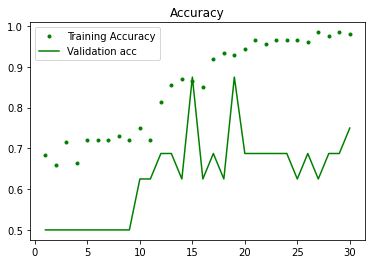

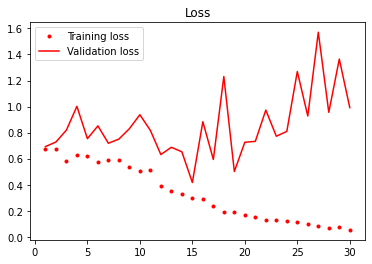

In [81]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [82]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.0452 - acc: 0.9900


In [83]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 6ms/step - loss: 0.6835 - acc: 0.7667


In [84]:
results_train

[0.04520443454384804, 0.9900000095367432]

In [85]:
results_test

[0.6835276484489441, 0.7666666507720947]

# Misc

X = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\NORMAL\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X.append (image)
print('X shape:', np.array(X).shape)

y = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\PNEUMONIA\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    y.append (image)
print('y shape:', np.array(y).shape)

load image as pixel array
image = image.imread("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\IM-0151-0001.jpeg")
summarize shape of the pixel array
print(image.dtype)
print(image.shape)
display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()